# 8.1

In [71]:
from sklearn.feature_extraction.text import CountVectorizer

In [72]:
import pandas as pd
import re

In [73]:
doc1 = "The fox chases the rabbit"
doc2 = "The rabbit ate the cabbage"
doc3 = "The fox caught the rabbit"

In [74]:
doc_list = []

doc_list.append(doc1.lower())
doc_list.append(doc2.lower())
doc_list.append(doc3.lower())

In [75]:
doc_list

['the fox chases the rabbit',
 'the rabbit ate the cabbage',
 'the fox caught the rabbit']

In [76]:
vector = CountVectorizer()
print(vector.fit_transform(doc_list).toarray()) # 코퍼스로부터 각 단어의 빈도 수를 기록한다.
print(vector.vocabulary_) # 각 단어의 인덱스가 어떻게 부여되었는지를 보여준다.

[[0 0 0 1 1 1 2]
 [1 1 0 0 0 1 2]
 [0 0 1 0 1 1 2]]
{'the': 6, 'fox': 4, 'chases': 3, 'rabbit': 5, 'ate': 0, 'cabbage': 1, 'caught': 2}


In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidfv = TfidfVectorizer().fit(doc_list)
print(tfidfv.transform(doc_list).toarray())
print(tfidfv.vocabulary_)

[[0.         0.         0.         0.54861178 0.4172334  0.32401895
  0.64803791]
 [0.51680194 0.51680194 0.         0.         0.         0.30523155
  0.61046311]
 [0.         0.         0.54861178 0.         0.4172334  0.32401895
  0.64803791]]
{'the': 6, 'fox': 4, 'chases': 3, 'rabbit': 5, 'ate': 0, 'cabbage': 1, 'caught': 2}


In [78]:
matrix = pd.DataFrame(tfidfv.transform(doc_list).toarray())

In [79]:
for i in range(len(list(tfidfv.vocabulary_.values()))):
    matrix.rename(columns = {list(tfidfv.vocabulary_.values())[i]:list(tfidfv.vocabulary_.keys())[i]}, inplace=True)

In [80]:
matrix

,ate,cabbage,caught,chases,fox,rabbit,the
0,0.000000,0.000000,0.000000,0.548612,0.417233,0.324019,0.648038
1,0.516802,0.516802,0.000000,0.000000,0.000000,0.305232,0.610463
2,0.000000,0.000000,0.548612,0.000000,0.417233,0.324019,0.648038


# 8.3

In [81]:
doc1 = "The game of life is a game of everlasting learning"
doc2 = "The unexamined life is not worth living"
doc3 = "Never stop learning"

In [82]:
doc_list = []

doc_list.append(doc1.lower())
doc_list.append(doc2.lower())
doc_list.append(doc3.lower())

In [83]:
vector = CountVectorizer()
print(vector.fit_transform(doc_list).toarray()) # 코퍼스로부터 각 단어의 빈도 수를 기록한다.
print(vector.vocabulary_) # 각 단어의 인덱스가 어떻게 부여되었는지를 보여준다.

[[1 2 1 1 1 0 0 0 2 0 1 0 0]
 [0 0 1 0 1 1 0 1 0 0 1 1 1]
 [0 0 0 1 0 0 1 0 0 1 0 0 0]]
{'the': 10, 'game': 1, 'of': 8, 'life': 4, 'is': 2, 'everlasting': 0, 'learning': 3, 'unexamined': 11, 'not': 7, 'worth': 12, 'living': 5, 'never': 6, 'stop': 9}


In [84]:
tfidfv = TfidfVectorizer().fit(doc_list)

In [85]:
matrix = pd.DataFrame(tfidfv.transform(doc_list).toarray())

In [86]:
for i in range(len(list(tfidfv.vocabulary_.values()))):
    matrix.rename(columns = {list(tfidfv.vocabulary_.values())[i]:list(tfidfv.vocabulary_.keys())[i]}, inplace=True)

In [87]:
matrix

,everlasting,game,is,learning,life,living,never,not,of,stop,the,unexamined,worth
0,0.297303,0.594606,0.226107,0.226107,0.226107,0.000000,0.000000,0.000000,0.594606,0.000000,0.226107,0.000000,0.000000
1,0.000000,0.000000,0.317570,0.000000,0.317570,0.417567,0.000000,0.417567,0.000000,0.000000,0.317570,0.417567,0.417567
2,0.000000,0.000000,0.000000,0.473630,0.000000,0.000000,0.622766,0.000000,0.000000,0.622766,0.000000,0.000000,0.000000


# 8.4.1 Euclidean similarity

In [88]:
import math

In [89]:
doc1 = [0.1, 0.2, 0.2, 0.1, 0.1, 0.1, 0.1, 0.1,  0,   0,  0,  0,  0,  0]
doc2 = [0.14286,0,0,0.14286, 0.14286,0,0,0,0.14286,0.14286,0.14286, 0.14286,0, 0]
doc3 = [0, 0, 0, 0,  0, 0,  0, 0.3333, 0,  0,  0,  0,  0.3333,  0.3333]

In [90]:
def dist(doc1, doc2):
    lst = []
    for i in range(len(doc1)):
        lst.append((doc1[i] - doc2[i]) ** 2)
        
    doc_sum = 0
    for l in lst:
        doc_sum += l
    return math.sqrt(doc_sum)

In [91]:
def cos(doc1, doc2):
    lst = []
    for i in range(len(doc1)):
        lst.append(doc1[i]*doc2[i])

    doc_sum = 0
    for l in lst:
        doc_sum += l
    
    doc1_sum = 0
    for l in doc1:
        doc1_sum += l ** 2
    doc1_sq = math.sqrt(doc1_sum)
    
    doc2_sum = 0
    for l in doc2:
        doc2_sum += l ** 2
    doc2_sq = math.sqrt(doc2_sum)
    
    return doc_sum / (doc1_sq * doc2_sq)

In [92]:
d_12 = dist(doc1, doc2)
d_13 = dist(doc1, doc3)
d_23 = dist(doc2, doc3)

In [93]:
cos_12 = cos(doc1, doc2)
cos_13 = cos(doc1, doc3)
cos_23 = cos(doc2, doc3)

In [94]:
print(d_12, d_13, d_23)

0.4440122264082375 0.6376571727817386 0.6900213961900021


In [95]:
print(cos_12, cos_13, cos_23)

0.30304576336566325 0.15430334996209188 0.0


# 8.4.2 

In [96]:
query = [0.5, 0.5]
doc1 = [0.1, 0.1]
doc2 = [0.14286, 0]
doc3 = [0, 0.3333]

In [97]:
d_query1 = dist(query, doc1)
d_query2 = dist(query, doc2)
d_query3 = dist(query, doc3)

In [98]:
cos_q1 = cos(query, doc1)
cos_q2 = cos(query, doc2)
cos_q3 = cos(query, doc3)

In [99]:
print(d_query1, d_query2, d_query3)

0.5656854249492381 0.6144501441126041 0.5270568185689282


In [100]:
print(cos_q1, cos_q2, cos_q3)

0.9999999999999999 0.7071067811865475 0.7071067811865475


# 8.5

In [101]:
# SciPy에서 ward 군집 함수와 덴드로그램 함수를 임포트합니다
from scipy.cluster.hierarchy import dendrogram, ward
from scipy.cluster import hierarchy
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd

In [102]:
x1 = [4, 8, 15, 24, 24]
x2 = [4, 4, 8, 4, 12]

In [103]:
x1 = pd.DataFrame(x1)
x2 = pd.DataFrame(x2)

X = pd.concat([x1,x2], axis = 1)

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [10.0, 10.0, 32.5, 32.5]],
 'dcoord': [[0.0, 8.0, 8.0, 0.0],
  [0.0, 4.0, 4.0, 0.0],
  [0.0, 8.06225774829855, 8.06225774829855, 4.0],
  [8.0, 9.848857801796104, 9.848857801796104, 8.06225774829855]],
 'ivl': ['3', '4', '2', '0', '1'],
 'leaves': [3, 4, 2, 0, 1],
 'color_list': ['b', 'g', 'b', 'b']}

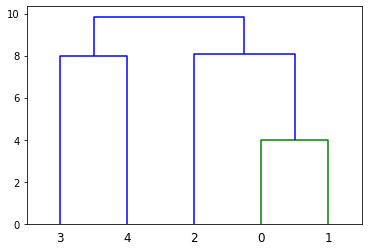

In [104]:
Z = hierarchy.linkage(X, 'single')
# linkage_array = ward(X)
#dendrogram(linkage_array)
dendrogram(Z)

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [10.0, 10.0, 32.5, 32.5]],
 'dcoord': [[0.0, 4.0, 4.0, 0.0],
  [0.0, 8.0, 8.0, 0.0],
  [0.0, 9.848857801796104, 9.848857801796104, 8.0],
  [4.0, 21.540659228538015, 21.540659228538015, 9.848857801796104]],
 'ivl': ['0', '1', '2', '3', '4'],
 'leaves': [0, 1, 2, 3, 4],
 'color_list': ['g', 'r', 'r', 'b']}

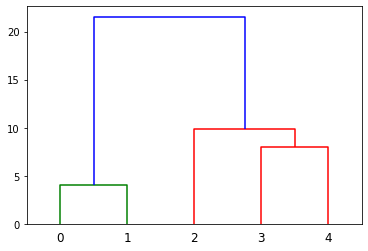

In [105]:
Z = hierarchy.linkage(X, 'complete')
# linkage_array = ward(X)
#dendrogram(linkage_array)
dendrogram(Z)

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [10.0, 10.0, 32.5, 32.5]],
 'dcoord': [[0.0, 4.0, 4.0, 0.0],
  [0.0, 8.0, 8.0, 0.0],
  [0.0, 9.848857801796104, 9.848857801796104, 8.0],
  [4.0, 15.86602678459242, 15.86602678459242, 9.848857801796104]],
 'ivl': ['0', '1', '2', '3', '4'],
 'leaves': [0, 1, 2, 3, 4],
 'color_list': ['g', 'r', 'r', 'b']}

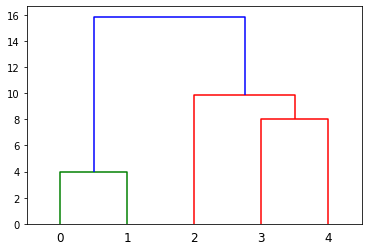

In [106]:
Z = hierarchy.linkage(X, 'average')
# linkage_array = ward(X)
#dendrogram(linkage_array)
dendrogram(Z)

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [10.0, 10.0, 32.5, 32.5]],
 'dcoord': [[0.0, 4.0, 4.0, 0.0],
  [0.0, 8.0, 8.0, 0.0],
  [0.0, 10.392304845413262, 10.392304845413262, 8.0],
  [4.0, 24.049948024891858, 24.049948024891858, 10.392304845413262]],
 'ivl': ['0', '1', '2', '3', '4'],
 'leaves': [0, 1, 2, 3, 4],
 'color_list': ['g', 'r', 'r', 'b']}

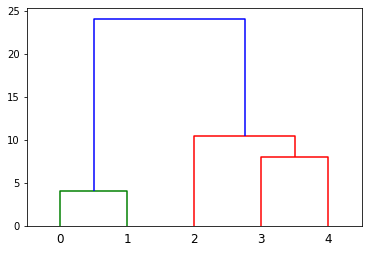

In [107]:
Z = hierarchy.linkage(X, 'ward')
# linkage_array = ward(X)
#dendrogram(linkage_array)
dendrogram(Z)

# 8.7 K-평균 클러스터링

In [108]:
from sklearn.cluster import KMeans
import numpy as np

In [109]:
x1 = pd.DataFrame([4, 8, 15, 24, 24])
x2 = pd.DataFrame([4, 4, 8, 4, 12])

X = pd.concat([x1,x2], axis = 1)
X.columns=["x1","x2"]

In [110]:
X

,x1,x2
0,4,4
1,8,4
2,15,8
3,24,4
4,24,12


In [111]:
kmeans = KMeans(n_clusters=2, algorithm='auto').fit(X)

In [112]:
kmeans.labels_

array([1, 1, 0, 0, 0])

In [113]:
predict = pd.DataFrame(kmeans.predict(X))
predict.columns=['predict']

In [114]:
r = pd.concat([X,predict],axis=1)

In [115]:
r

,x1,x2,predict
0,4,4,1
1,8,4,1
2,15,8,0
3,24,4,0
4,24,12,0


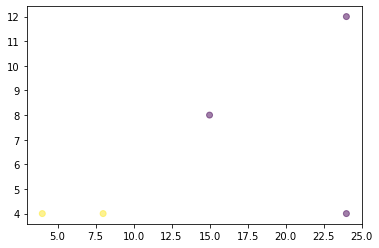

In [116]:
plt.scatter(r['x1'],r['x2'],c=r['predict'],alpha=0.5)

# 8.8

In [117]:
doc1 = "Stray cats are running all over the place. I see 10 a day!" 
doc2 = "Cats are killers. They kill billions of animals a year." 
doc3 = "The best food in Columbus, OH is   the North Market." 
doc4 = "Brand A is the best tasting cat food around. Your cat will love it." 
doc5 = "Buy Brand C cat food for your cat. Brand C makes healthy and happy cats." 
doc6 = "The Arnold Classic came to town this weekend. It reminds us to be healthy." 
doc7 = "I have nothing to say. In summary, I have told you nothing." 

doc_list = []
doc_list.append(doc1)
doc_list.append(doc2)
doc_list.append(doc3)
doc_list.append(doc4)
doc_list.append(doc5)
doc_list.append(doc6)
doc_list.append(doc7) 

query = "Healthy cat food" 

In [118]:
new = []
for i in doc_list:
    new.append(re.sub("[^a-zA-Z]", " ", i))
new.append(query)

In [119]:
new

['Stray cats are running all over the place  I see    a day ',
 'Cats are killers  They kill billions of animals a year ',
 'The best food in Columbus  OH is   the North Market ',
 'Brand A is the best tasting cat food around  Your cat will love it ',
 'Buy Brand C cat food for your cat  Brand C makes healthy and happy cats ',
 'The Arnold Classic came to town this weekend  It reminds us to be healthy ',
 'I have nothing to say  In summary  I have told you nothing ',
 'Healthy cat food']

In [120]:
vector = CountVectorizer()
print(vector.fit_transform(new).toarray()) # 코퍼스로부터 각 단어의 빈도 수를 기록한다.
print(vector.vocabulary_) # 각 단어의 인덱스가 어떻게 부여되었는지를 보여준다.

[[1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
  0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0
  0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 0 0
  0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 1 0 1 0 0 2 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1]
 [0 1 0 0 0 0 0 0 0 2 1 0 2 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
  1 0 0 0 0 0 0 1 0 1 2 0 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 1 0 0 0 0 0 0 0 0 2 0 0 0 0
  0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
{'stray': 40, 'cats': 13, 'are': 3, 'running': 37, 'all': 0, 'over': 34, 'the':

In [121]:
tfidfv = TfidfVectorizer().fit(vector.vocabulary_.keys())

In [122]:
matrix = pd.DataFrame(tfidfv.transform(new).toarray())

In [123]:
for i in range(len(list(tfidfv.vocabulary_.values()))):
    matrix.rename(columns = {list(tfidfv.vocabulary_.values())[i]:list(tfidfv.vocabulary_.keys())[i]}, inplace=True)

In [125]:
matrix

,all,and,animals,are,arnold,around,be,best,billions,brand,...,this,to,told,town,us,weekend,will,year,you,your
0,0.316228,0.000000,0.000000,0.316228,0.00,0.000000,0.00,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.333333,0.333333,0.00,0.000000,0.00,0.000000,0.333333,0.000000,...,0.00,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.333333,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.288675,0.000000,0.000000,...,0.00,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.00,0.258199,0.00,0.258199,0.000000,0.258199,...,0.00,0.000000,0.000000,0.00,0.00,0.00,0.258199,0.000000,0.000000,0.258199
4,0.000000,0.242536,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.485071,...,0.00,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.242536
5,0.000000,0.000000,0.000000,0.000000,0.25,0.000000,0.25,0.000000,0.000000,0.000000,...,0.25,0.500000,0.000000,0.25,0.25,0.25,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,...,0.00,0.267261,0.267261,0.00,0.00,0.00,0.000000,0.000000,0.267261,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,...,0.00,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.000000


{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [35.0, 35.0, 45.0, 45.0],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [40.0, 40.0, 62.5, 62.5],
  [12.5, 12.5, 51.25, 51.25]],
 'dcoord': [[0.0, 0.937963716130636, 0.937963716130636, 0.0],
  [0.0, 1.05316221506947, 1.05316221506947, 0.937963716130636],
  [0.0, 1.2563291681101003, 1.2563291681101003, 0.0],
  [0.0, 1.308176159928466, 1.308176159928466, 0.0],
  [0.0, 1.347286897292206, 1.347286897292206, 1.308176159928466],
  [1.2563291681101003,
   1.4943475403445745,
   1.4943475403445745,
   1.347286897292206],
  [1.05316221506947,
   1.7070094492775227,
   1.7070094492775227,
   1.4943475403445745]],
 'ivl': ['3', '4', '7', '0', '1', '6', '2', '5'],
 'leaves': [3, 4, 7, 0, 1, 6, 2, 5],
 'color_list': ['g', 'g', 'b', 'b', 'b', 'b', 'b']}

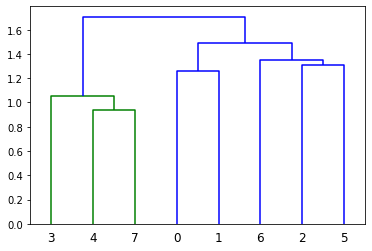

In [126]:
Z = hierarchy.linkage(matrix, 'ward')
dendrogram(Z)

# 8.9

In [127]:
from collections import Counter
from konlpy.tag import Twitter
from konlpy.tag import Kkma
import pytagcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html


In [195]:
doc1 = "나에게 술 한 잔 사주지인생은  않았다. 겨울밤 막다른 골목 끝 포장마차에서 빈 호주머니를 털 털 털 털어 나는 볓 번이나 인생에게 술을 사주었으나 인생은 나를 위하여 단 한 번도 술 한 잔 사주지 않았다."
doc2 = "우리가 어느 별에서 만났기에 이토록 서로 그리워하느냐. 우리가 어느 별에서 그리워하였기에 이토록 서로 사랑하고 있느냐."
doc3 = "나는 그늘이 없는 사람을 사랑하지 않는다. 나는 그늘을 사랑하지 않는 사람을 사랑하지 않는다. 나는 한 그루 나무의 그늘이 된 사람을 사랑한다. 햇빛도 그늘이 있어야 맑고 눈이 부시다."
doc4 = "길이 끝나는 곳에서도 길이 있다. 길이 끝나는 곳에서도 길이 되는 사람이 있다. 스스로 봄 길이 되어 끝없이 걸어가는 사람이 있다."

query = "술 한 잔"
# query = "우리가 어느 별에서"
# query = "내가 사랑하는 사람"
# query = "봄 길"

In [196]:
doc = []

doc.append(doc1)
doc.append(doc2)
doc.append(doc3)
doc.append(doc4)
doc.append(query)

In [197]:
nlp = Twitter()  
nouns = []

for d in doc:
    nouns.append(nlp.nouns(d))

C:\Users\K.N.W\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [198]:
nouns

[['나',
  '술',
  '잔',
  '사주지',
  '인생',
  '겨울',
  '밤',
  '막',
  '다른',
  '골목',
  '끝',
  '포장마차',
  '빈',
  '호주머니',
  '털',
  '털',
  '털',
  '나',
  '볓',
  '번',
  '인생',
  '술',
  '인생',
  '위',
  '단',
  '번',
  '술',
  '잔',
  '사주지'],
 ['우리', '별', '이', '서로', '우리', '별', '이', '서로', '사랑'],
 ['나',
  '그늘',
  '사람',
  '사랑',
  '나',
  '그늘',
  '사랑',
  '사람',
  '사랑',
  '나',
  '그루',
  '나무',
  '그늘',
  '사람',
  '사랑',
  '햇빛',
  '그늘',
  '눈',
  '부시'],
 ['길이', '곳', '길이', '길이', '곳', '길이', '사람', '스스로', '봄', '길이', '사람'],
 ['술', '잔']]

In [199]:
new = []

for i in range(len(nouns)):
    word = " "
    for n in nouns[i]:
        word = word + str(n.split(",")[0]) + " "
    new.append(word)

In [200]:
new

[' 나 술 잔 사주지 인생 겨울 밤 막 다른 골목 끝 포장마차 빈 호주머니 털 털 털 나 볓 번 인생 술 인생 위 단 번 술 잔 사주지 ',
 ' 우리 별 이 서로 우리 별 이 서로 사랑 ',
 ' 나 그늘 사람 사랑 나 그늘 사랑 사람 사랑 나 그루 나무 그늘 사람 사랑 햇빛 그늘 눈 부시 ',
 ' 길이 곳 길이 길이 곳 길이 사람 스스로 봄 길이 사람 ',
 ' 술 잔 ']

In [201]:
vector = CountVectorizer()
print(vector.fit_transform(new).toarray()) # 코퍼스로부터 각 단어의 빈도 수를 기록한다.
print(vector.vocabulary_) # 각 단어의 인덱스가 어떻게 부여되었는지를 보여준다.

[[1 1 0 0 0 0 1 0 0 0 2 0 0 0 3 1 0 1]
 [0 0 0 0 0 0 0 0 0 1 0 2 0 2 0 0 0 0]
 [0 0 4 1 0 1 0 1 3 4 0 0 0 0 0 0 1 0]
 [0 0 0 0 5 0 0 0 2 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
{'사주지': 10, '인생': 14, '겨울': 0, '다른': 6, '골목': 1, '포장마차': 15, '호주머니': 17, '우리': 13, '서로': 11, '사랑': 9, '그늘': 2, '사람': 8, '그루': 3, '나무': 5, '햇빛': 16, '부시': 7, '길이': 4, '스스로': 12}


In [202]:
tfidfv = TfidfVectorizer().fit(doc)

In [203]:
matrix = pd.DataFrame(tfidfv.transform(new).toarray())

In [204]:
for i in range(len(list(tfidfv.vocabulary_.values()))):
    matrix.rename(columns = {list(tfidfv.vocabulary_.values())[i]:list(tfidfv.vocabulary_.keys())[i]}, inplace=True)

In [264]:
matrix

,걸어가는,겨울밤,골목,곳에서도,그늘을,그늘이,그루,그리워하느냐,그리워하였기에,길이,...,이토록,인생에게,인생은,있느냐,있다,있어야,털어,포장마차에서,햇빛도,호주머니를
0,0.0,0.0,0.447214,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.980581,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


{'icoord': [[35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [15.0, 15.0, 32.5, 32.5],
  [5.0, 5.0, 23.75, 23.75]],
 'dcoord': [[0.0, 0.9999999999999999, 0.9999999999999999, 0.0],
  [0.0, 1.0, 1.0, 0.9999999999999999],
  [0.0, 1.0, 1.0, 1.0],
  [0.0, 1.0, 1.0, 1.0]],
 'ivl': ['3', '2', '1', '0', '4'],
 'leaves': [3, 2, 1, 0, 4],
 'color_list': ['b', 'b', 'b', 'b']}

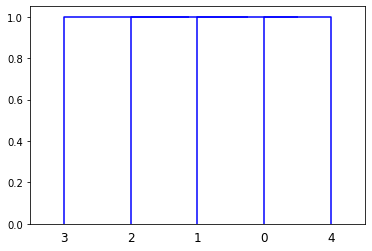

In [272]:
X = 
Z = hierarchy.linkage(matrix, method = 'single') #, metric = 'cosine'가 안먹힘
dendrogram(Z)

# 8.10 LDA

In [36]:
import nltk; nltk.download('stopwords')
nltk.download('punkt')
import nltk
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\K.N.W\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\K.N.W\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [46]:
file = open('D:/4학년 1학기/R2Python/topic.txt', mode='r', encoding='utf-8')

In [47]:
document = file.readlines()

In [49]:
new = []
for d in document:
    new.append(re.sub("\n", "", d))

In [50]:
new

['I like to eat oranges, apples, and bananas.',
 'I ate apples and bananas for breakfast.',
 'Poodles and teeth are cute.',
 'I adopted a poodle yesterday.',
 'Look at the cute poodle that eats apples.']

In [51]:
import pandas as pd
text = pd.DataFrame(new)
text.columns = ["document"]

In [52]:
text

,document
0,"I like to eat oranges, apples, and bananas."
1,I ate apples and bananas for breakfast.
2,Poodles and teeth are cute.
3,I adopted a poodle yesterday.
4,Look at the cute poodle that eats apples.


In [53]:
text['document'] = text.apply(lambda row: nltk.word_tokenize(row['document']), axis=1)
text.head()

,document
0,"[I, like, to, eat, oranges, ,, apples, ,, and,..."
1,"[I, ate, apples, and, bananas, for, breakfast, .]"
2,"[Poodles, and, teeth, are, cute, .]"
3,"[I, adopted, a, poodle, yesterday, .]"
4,"[Look, at, the, cute, poodle, that, eats, appl..."


In [54]:
# 불용어 처리
from nltk.corpus import stopwords
stop = stopwords.words('english')
text['document'] = text['document'].apply(lambda x: [word for word in x if word not in (stop)])
text.head()

,document
0,"[I, like, eat, oranges, ,, apples, ,, bananas, .]"
1,"[I, ate, apples, bananas, breakfast, .]"
2,"[Poodles, teeth, cute, .]"
3,"[I, adopted, poodle, yesterday, .]"
4,"[Look, cute, poodle, eats, apples, .]"


In [56]:
# 표제어 추출
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
text['document'] = text['document'].apply(lambda x : [WordNetLemmatizer().lemmatize(word, pos='v') for word in x])
text.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\K.N.W\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


,document
0,"[I, like, eat, oranges, ,, apples, ,, bananas, .]"
1,"[I, eat, apples, bananas, breakfast, .]"
2,"[Poodles, teeth, cute, .]"
3,"[I, adopt, poodle, yesterday, .]"
4,"[Look, cute, poodle, eat, apples, .]"


In [58]:
tokenized_doc = text['document'].apply(lambda x : [word for word in x if len(word) > 3])
tokenized_doc[:5]

0    [like, oranges, apples, bananas]
1        [apples, bananas, breakfast]
2              [Poodles, teeth, cute]
3          [adopt, poodle, yesterday]
4        [Look, cute, poodle, apples]
Name: document, dtype: object

In [59]:
# 역토큰화
detokenized_doc = []
for i in range(len(text)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)
text['document'] = detokenized_doc
# 다시 text['headline_text'] 에 저장
text.head()

,document
0,like oranges apples bananas
1,apples bananas breakfast
2,Poodles teeth cute
3,adopt poodle yesterday
4,Look cute poodle apples


In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(text['document'])
X.shape

(5, 12)

In [65]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model = LatentDirichletAllocation(n_components=10, learning_method='online', random_state=777, max_iter=1)
lda_top = lda_model.fit_transform(X)
print(lda_model.components_)
print(lda_model.components_.shape)

[[0.79188024 0.83530316 0.99067392 0.8931315  0.69517349 1.01946244
  0.8743554  1.09913965 0.77902876 0.78476838 0.90587945 0.8510195 ]
 [0.86690879 0.79242022 1.04775937 0.86697403 1.00232472 0.83406467
  0.89954636 0.71110747 0.77578323 0.99264342 1.06786299 0.81812002]
 [0.72056774 0.81893649 0.9963092  0.9458092  0.67561085 0.85642736
  0.8530633  0.78106734 0.84217403 0.92849392 0.89137852 0.80426606]
 [0.86645013 0.86295462 0.82268655 0.79853147 0.87230871 0.86253113
  0.88290049 0.80713838 0.79890451 0.99984221 0.91163153 0.8905903 ]
 [0.87505858 0.76487514 0.75792189 0.71628513 0.8110899  0.76003468
  0.83427813 0.92840432 0.87345084 0.87425309 0.80783097 0.79699048]
 [0.81114205 0.78039023 0.95050255 0.92524053 0.88296352 0.87037883
  0.90518729 0.91576691 0.82165568 0.84537381 0.8595161  0.63961506]
 [0.94314431 0.78613639 0.79602348 0.85585815 0.81473888 0.8299778
  0.79425353 0.92116315 1.04647113 0.74992552 0.97743847 1.00218101]
 [0.79619561 0.78828698 0.87036072 0.86636

In [66]:
terms = vectorizer.get_feature_names() 
# 단어 집합. 1,000개의 단어가 저장되어있음.
def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        print("Topic %d :" % (idx+1), [(feature_names[i], topic[i].round(2)) for i in topic.argsort()[:-n -1:-1]])
get_topics(lda_model.components_, terms)

Topic 1 : [('oranges', 1.1), ('like', 1.02), ('bananas', 0.99), ('teeth', 0.91), ('breakfast', 0.89)]
Topic 2 : [('teeth', 1.07), ('bananas', 1.05), ('cute', 1.0), ('poodles', 0.99), ('look', 0.9)]
Topic 3 : [('bananas', 1.0), ('breakfast', 0.95), ('poodles', 0.93), ('teeth', 0.89), ('like', 0.86)]
Topic 4 : [('poodles', 1.0), ('teeth', 0.91), ('yesterday', 0.89), ('look', 0.88), ('cute', 0.87)]
Topic 5 : [('oranges', 0.93), ('adopt', 0.88), ('poodles', 0.87), ('poodle', 0.87), ('look', 0.83)]
Topic 6 : [('bananas', 0.95), ('breakfast', 0.93), ('oranges', 0.92), ('look', 0.91), ('cute', 0.88)]
Topic 7 : [('poodle', 1.05), ('yesterday', 1.0), ('teeth', 0.98), ('adopt', 0.94), ('oranges', 0.92)]
Topic 8 : [('bananas', 0.87), ('like', 0.87), ('breakfast', 0.87), ('poodle', 0.83), ('look', 0.82)]
Topic 9 : [('poodle', 0.92), ('cute', 0.9), ('breakfast', 0.88), ('bananas', 0.87), ('adopt', 0.85)]
Topic 10 : [('cute', 1.02), ('apples', 1.02), ('poodle', 0.92), ('look', 0.87), ('adopt', 0.85)